In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from utils import *

data_folder = 'data/msw_exp'

data_file_names = os.listdir(data_folder)

data_file_list = [os.path.join(data_folder, f) for f in data_file_names]

data_file_names.sort(key=natural_keys)
data_file_list.sort(key=natural_keys)

In [2]:
import seaborn as sns

color_palette = sns.color_palette("colorblind", 4)
color_list = [tuple(color) for color in color_palette]

color_dict = {'wt': color_list[0],
              'braf': color_list[1],
              'kras': color_list[2],
              'braf-kras': color_list[3]}


In [3]:
dataframe_list = []
data_dict_list = []

green_key = 'Count_gfp_objects'
red_key = 'Count_texasred_objects'
blue_key = 'Count_dapi_objects'

index_column = 'FileName_dapi'

for file_path in data_file_list:
    df = pd.read_csv(file_path)
    dataframe_list.append(df)

    data = {}
    for i in df.index:
        cur_row  = df.iloc[i]
        name = cur_row[index_column]
        well_indx = name.find('_')
        well = cur_row[index_column][0:well_indx]
        if well in data.keys():
            data[well]['green'].append(cur_row[green_key])
            data[well]['red'].append(cur_row[red_key])
            data[well]['blue'].append(cur_row[blue_key])
        else:
            dict_t = {'green':[cur_row[green_key]],
                    'red':[cur_row[red_key]],
                    'blue':[cur_row[blue_key]]}
            data[well] = dict_t
    
    data_dict_list.append(data)


In [4]:
col_list = np.arange(8)+2
col_list = list(col_list)
col_list = [str(col) for col in col_list]

row_list = ['B','C','D','E','F','G']

# time = np.arange(len(data_dict_list[0]['B2']['green']))*4

col_key_color = {'2':'green',
           '3':'red',
           '4':'red',
           '5':'blue',
           '6':'green',
           '7':'red',
           '8':'red',
           '9':'blue'}

col_key_genotype = {'2':'wt',
                    '3':'braf',
                    '4':'kras',
                    '5':'braf-kras',
                    '6':'wt',
                    '7':'braf',
                    '8':'kras',
                    '9':'braf-kras'}

# for plate_indx in range(len(data_dict_list)):
#     # check if the plate is a 'c' plate

#     if data_file_names[plate_indx][1] == 'c':
#         fig,ax_list = plt.subplots(ncols=8,nrows=6,figsize=(10,8),
#                             sharex=True,sharey=True)

#         ax_list = ax_list.flatten()
#         ax_indx = 0

#         for row in row_list:
#             for col in col_list:
#                 ax = ax_list[ax_indx]
#                 key = row+col
#                 data = data_dict_list[plate_indx][key]

#                 color = col_key_color[col]
#                 genotype = col_key_genotype[col]
#                 plot_color = color_dict[genotype]

#                 ts = data[color]
#                 time = np.arange(len(ts))*4
#                 ax.plot(time,ts,color=plot_color,linewidth=2)

#                 ax_indx+=1
#                 ax.set_yscale('symlog',linthresh=10)
#                 ax.set_title(key)
                

#         fig.suptitle(data_file_list[plate_indx])
#         fig.tight_layout()

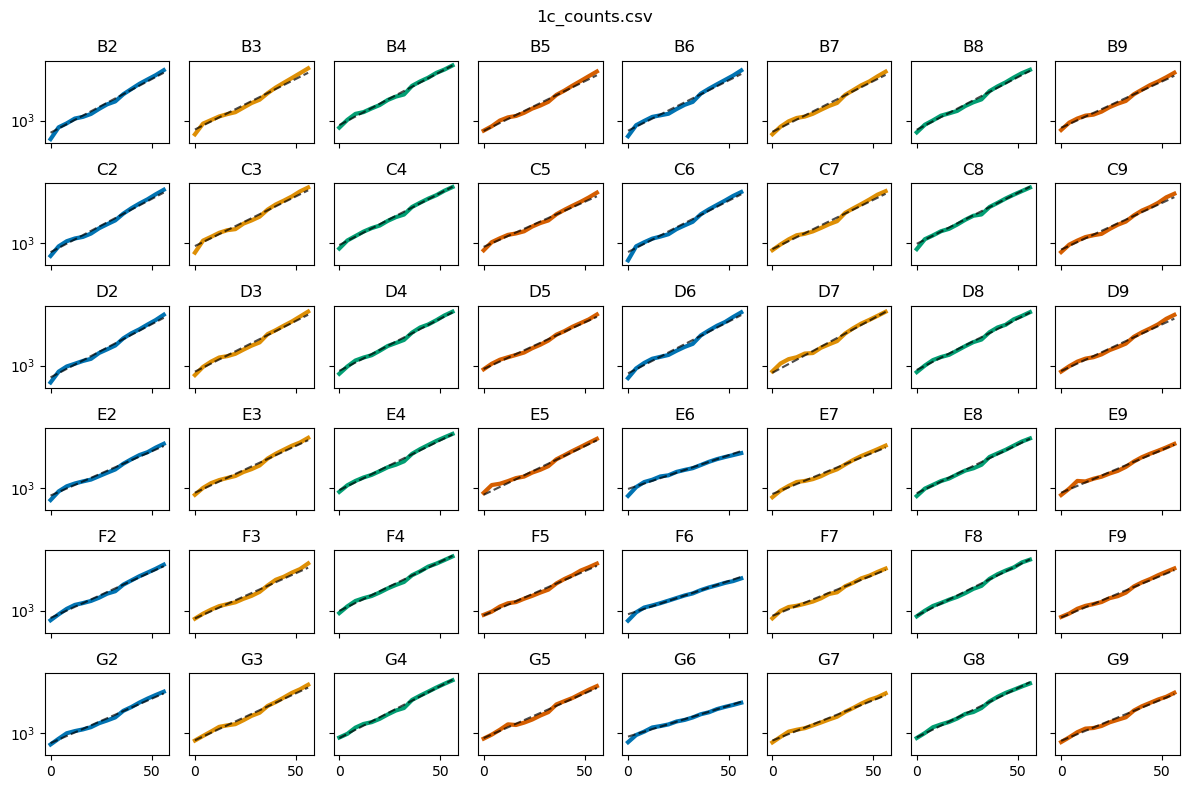

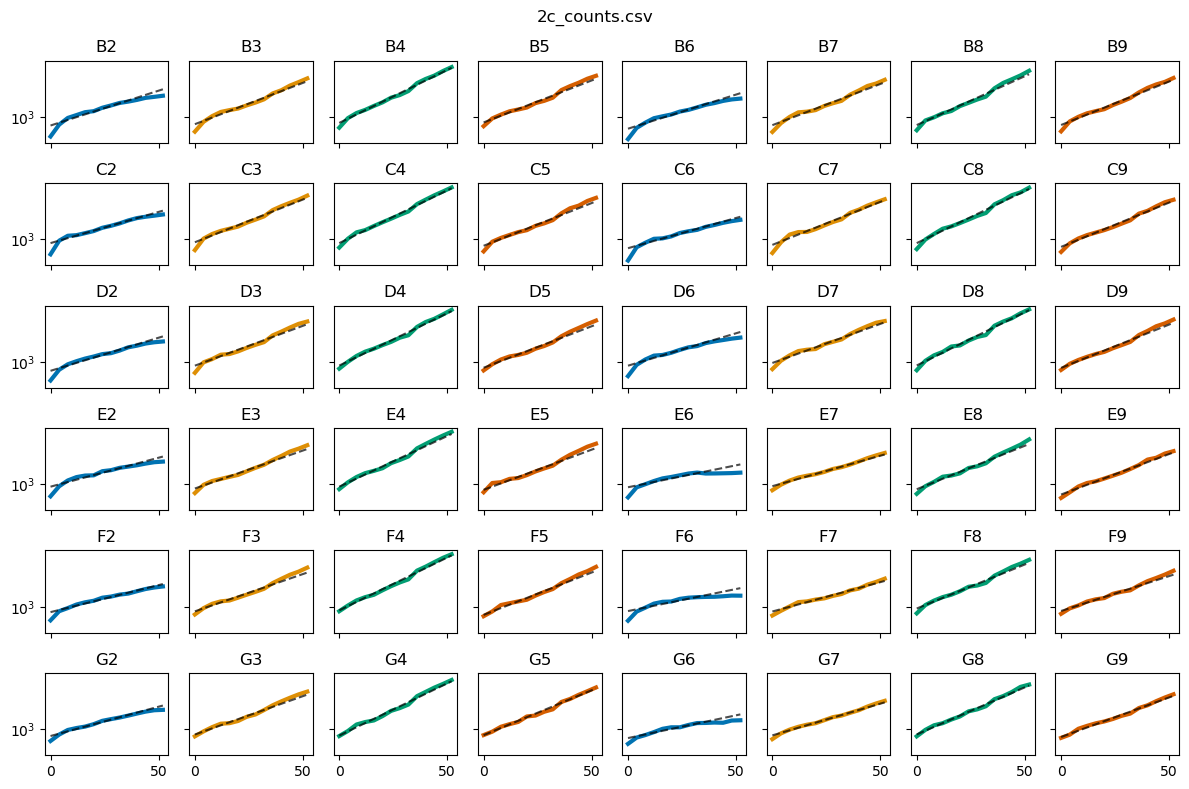

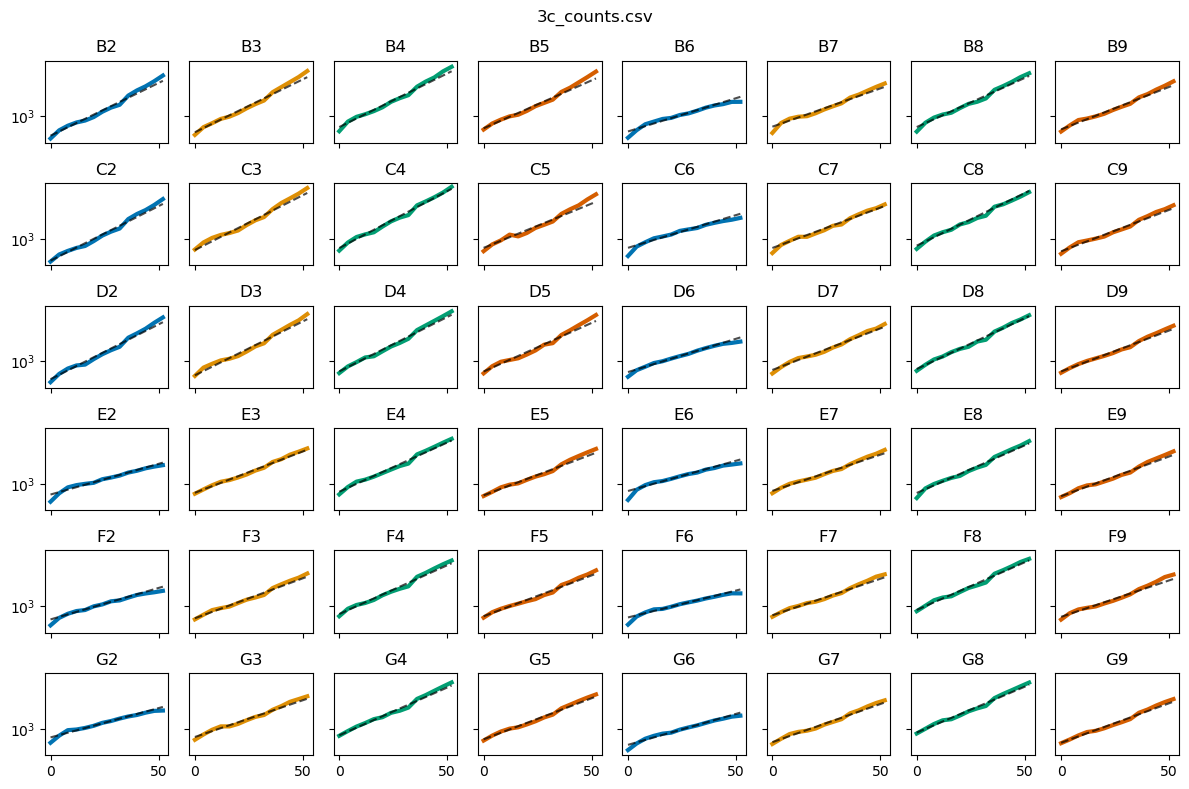

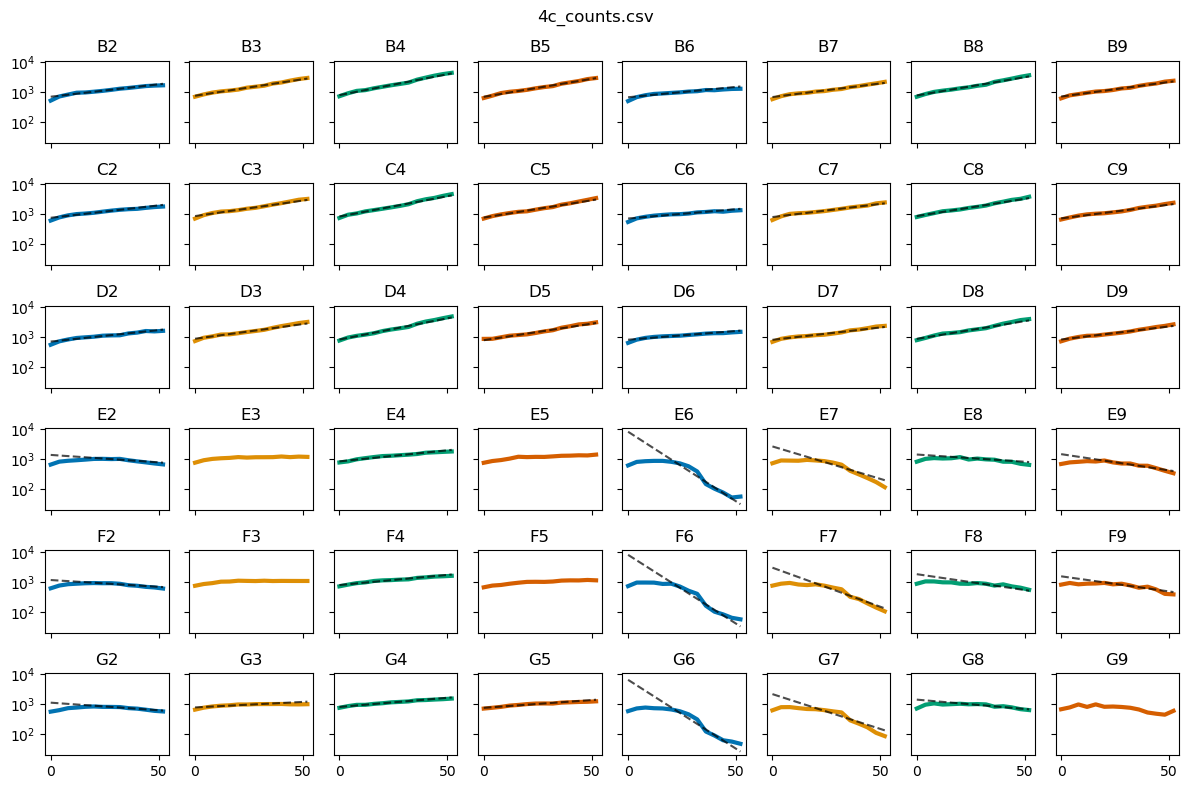

In [5]:
slope_est_options = {'exclude':1,'window':5,'step':2,'thresh':0.5}

for plate_indx in range(len(data_dict_list)):
    # check if the plate is a 'c' plate

    if data_file_names[plate_indx][1] == 'c':
        plot_plate(data_dict_list[plate_indx],col_list=col_list,row_list=row_list,
                col_key_color=col_key_color,col_key_genotype=col_key_genotype,
                color_dict=color_dict,plot_fit=True,slope_est_options=slope_est_options,
                title=data_file_names[plate_indx],label_well=True);

In [6]:
gefitinib_conc = [0,7.5*10**-9,22*10**-9,67*10**-9,200*10**-9,600*10**-9,1800*10**-9,5400*10**-9]

row_list = ['B','C','D','E','F','G']

gefitib_dict = {gefitinib_conc[0]:(1,(0,2),(0,3)), # key is concentration, value is (plate_indx,(row range indx,col range indx))
                gefitinib_conc[1]:(1,(0,2),(4,7)),
                gefitinib_conc[2]:(1,(3,5),(0,3)),
                gefitinib_conc[3]:(1,(3,5),(4,7)),
                gefitinib_conc[4]:(2,(0,2),(0,3)),
                gefitinib_conc[5]:(2,(0,2),(4,7)),
                gefitinib_conc[6]:(2,(3,5),(0,3)),
                gefitinib_conc[7]:(2,(3,5),(4,7))}
gr_dict = {}

slope_est_options = {'exclude':1,'window':5,'step':2,'thresh':0.5}

# fig,ax_list = plt.subplots(ncols=8,nrows=6,figsize=(10,8))

for conc in gefitib_dict.keys():
    plate_indx = gefitib_dict[conc][0]
    row_range = gefitib_dict[conc][1]
    col_range = gefitib_dict[conc][2]
    
    # columns = [str(col) for col in np.arange(col_range[0],col_range[1]+1)]
    columns = [col for col in col_list[col_range[0]:col_range[1]+1]]
    rows = [row for row in row_list[row_range[0]:row_range[1]+1]]

    dict_t = {}

    for gen_indx in range(len(columns)):
        col = columns[gen_indx]
        gr_t = []
        for row in rows:
            key = row+col
            color = col_key_color[col]

            plate_name = str(plate_indx)+'c_counts.csv'

            plate_num = np.argwhere(np.array(data_file_names) == plate_name)[0][0]

            ts = data_dict_list[plate_num][key][color]
            time = np.arange(len(ts))*4

            col_indx = np.argwhere(np.array(col_list) == col)[0][0]
            row_indx = np.argwhere(np.array(row_list) == row)[0][0]

            # ax = ax_list[row_indx,col_indx]
            # ax.plot(time,ts,color=color_dict[col_key_genotype[col]],linewidth=2)
            # ax.set_yscale('symlog',linthresh=10)

            # fit = est_linear_slope(ts,time=time,**slope_est_options,return_fit=True)
            # if type(fit) == tuple:
            #     fit_t = time*fit[0] + fit[1]
            #     fit_t = np.e**fit_t
            #     ax.plot(time,fit_t,'--',color='black',alpha=0.7)
            
            
            slope_est = est_linear_slope(ts,time=time,**slope_est_options,
                                         return_fit=False,debug=False)
            gr_t.append(slope_est)

            # print(slope_est)
            # print('\n')

        mean_gr = np.nanmean(gr_t)
        std_err = np.nanstd(gr_t)/np.sqrt(len(gr_t))
        dict_t[col_key_genotype[col]] = (mean_gr,std_err)
    gr_dict[conc] = dict_t

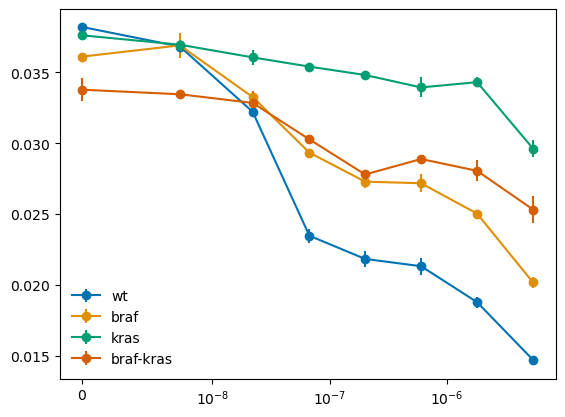

In [7]:
fig,ax = plt.subplots()
genotypes = ['wt','braf','kras','braf-kras']

for gen_indx in range(4):
    genotype = genotypes[gen_indx]
    gr_list = []
    err_list = []
    for conc in gefitinib_conc:
        gr_list.append(gr_dict[conc][genotype][0])
        err_list.append(gr_dict[conc][genotype][1])
    ax.errorbar(gefitinib_conc,gr_list,yerr=err_list,color=color_dict[genotype],marker='o',label=genotype)

ax.legend(frameon=False)
ax.set_xscale('symlog',linthresh=10**-8)


In [8]:
# gefitinib_conc = [0,7.5*10**-9,22*10**-9,67*10**-9,200*10**-9,600*10**-9,1800*10**-9,5400*10**-9]
max_conc = 10*10**-6

osi_conc = []
for i in range(7):
    osi_conc.append(max_conc/(3**i))

# reverse the list and append 0
osi_conc.append(0)
osi_conc = osi_conc[::-1]

print(osi_conc)

row_list = ['B','C','D','E','F','G']

osi_dict = {osi_conc[0]:(3,(0,2),(0,3)), # key is concentration, value is (plate_indx,(row range indx,col range indx))
                osi_conc[1]:(3,(0,2),(4,7)),
                osi_conc[2]:(3,(3,5),(0,3)),
                osi_conc[3]:(3,(3,5),(4,7)),
                osi_conc[4]:(4,(0,2),(0,3)),
                osi_conc[5]:(4,(0,2),(4,7)),
                osi_conc[6]:(4,(3,5),(0,3)),
                osi_conc[7]:(4,(3,5),(4,7))}
gr_dict = {}

slope_est_options = {'exclude':1,'window':5,'step':2,'thresh':0.5}

# fig,ax_list = plt.subplots(ncols=8,nrows=6,figsize=(10,8))

for conc in osi_dict.keys():
    plate_indx = osi_dict[conc][0]
    row_range = osi_dict[conc][1]
    col_range = osi_dict[conc][2]
    
    # columns = [str(col) for col in np.arange(col_range[0],col_range[1]+1)]
    columns = [col for col in col_list[col_range[0]:col_range[1]+1]]
    rows = [row for row in row_list[row_range[0]:row_range[1]+1]]

    dict_t = {}

    for gen_indx in range(len(columns)):
        col = columns[gen_indx]
        gr_t = []
        for row in rows:
            key = row+col
            color = col_key_color[col]

            plate_name = str(plate_indx)+'c_counts.csv'

            plate_num = np.argwhere(np.array(data_file_names) == plate_name)[0][0]

            ts = data_dict_list[plate_num][key][color]
            time = np.arange(len(ts))*4

            col_indx = np.argwhere(np.array(col_list) == col)[0][0]
            row_indx = np.argwhere(np.array(row_list) == row)[0][0]
            
            slope_est = est_linear_slope(ts,time=time,**slope_est_options,
                                         return_fit=False,debug=False)
            gr_t.append(slope_est)

        mean_gr = np.nanmean(gr_t)
        std_err = np.nanstd(gr_t)/np.sqrt(len(gr_t))
        dict_t[col_key_genotype[col]] = (mean_gr,std_err)
    gr_dict[conc] = dict_t

[0, 1.371742112482853e-08, 4.115226337448559e-08, 1.2345679012345677e-07, 3.7037037037037036e-07, 1.111111111111111e-06, 3.333333333333333e-06, 9.999999999999999e-06]


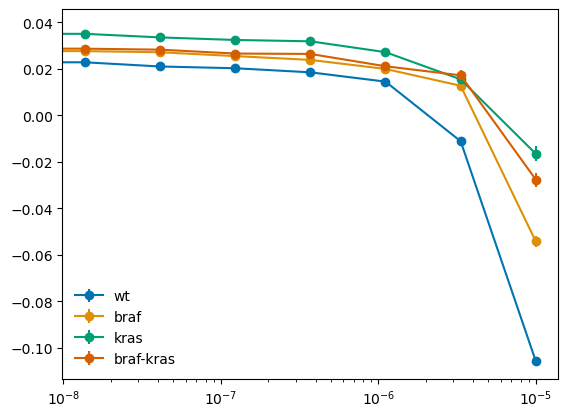

In [9]:
fig,ax = plt.subplots()
genotypes = ['wt','braf','kras','braf-kras']

for gen_indx in range(4):
    genotype = genotypes[gen_indx]
    gr_list = []
    err_list = []
    for conc in osi_conc:
        gr_list.append(gr_dict[conc][genotype][0])
        err_list.append(gr_dict[conc][genotype][1])
    ax.errorbar(osi_conc,gr_list,yerr=err_list,color=color_dict[genotype],marker='o',label=genotype)

ax.legend(frameon=False)
ax.set_xscale('log')

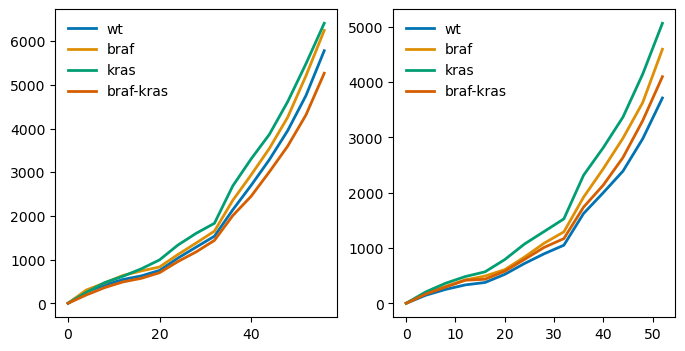

In [10]:
# plot all drug free conditions on one plot

fig,ax_list = plt.subplots(ncols=2,figsize=(8,4))

plate_indx = np.argwhere(np.array(data_file_names) == '1c_counts.csv')[0][0]

data = data_dict_list[plate_indx]

row_list = ['B','C','D']
ax = ax_list[0]
for col in range(2,6):
    ts_list = []
    for row in row_list:
        key = row+str(col)
        color = col_key_color[str(col)]
        ts = data[key][color]
        time = np.arange(len(ts))*4
        ts_list.append(ts)
    ts = np.nanmean(np.array(ts_list),axis=0)
    ts = ts-ts[0]
    ax.plot(time,ts,color=color_dict[col_key_genotype[str(col)]],linewidth=2,
            label=col_key_genotype[str(col)])
        # ax.plot(time,ts,color=color_dict[col_key_genotype[str(col)]],linewidth=2)

ax.legend(frameon=False)
# ax.set_yscale('log')

plate_indx = np.argwhere(np.array(data_file_names) == '3c_counts.csv')[0][0]

data = data_dict_list[plate_indx]

row_list = ['B','C','D']
ax = ax_list[1]
for col in range(2,6):
    ts_list = []
    for row in row_list:
        key = row+str(col)
        color = col_key_color[str(col)]
        ts = data[key][color]
        time = np.arange(len(ts))*4
        ts_list.append(ts)
    ts = np.nanmean(np.array(ts_list),axis=0)
    ts = ts-ts[0]
    ax.plot(time,ts,color=color_dict[col_key_genotype[str(col)]],linewidth=2,
            label=col_key_genotype[str(col)])
        # ax.plot(time,ts,color=color_dict[col_key_genotype[str(col)]],linewidth=2)

ax.legend(frameon=False)

# ax.set_yscale('log')